In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import ed_conserve as ed
import scipy.sparse.linalg
import importlib 


## a)
ed_conserve.py implements the same Hamiltonian as in the last weeks, namely
$$
 H = - J \sum_{j = 0}^{L-1} \sigma^x_j \sigma^x_{j+1} - g \sum_{j=0}^{L-1} \sigma^z_j
$$
Call the function calc_H() for N = 10, J = 1, g = 0.1 to obtain a dictionary of block-
Hamiltonians. Determine the ground state energy using scipy.sparse.linalg.eigsh
and ensure that you get the same result as in last weeks program (which should be
E0 ≈ −10.0250156642343).
Call the function calc_H() for N = 10, J = 1, g = 0.1 to obtain a dictionary of block-
Hamiltonians. Determine the ground state energy using scipy.sparse.linalg.eigsh
and ensure that you get the same result as in last weeks program (which should be
E0 ≈ −10.0250156642343)

In [14]:
N = 10
J = 1
g = 0.1
H = ed.calc_H(N, J, g)
groundeigval, groundeigstate = scipy.sparse.linalg.eigsh( H[0] , k = 1, which = 'SA', return_eigenvectors=True)
groundeigval

Generating Hamiltonian ... 

done


array([-10.02501566])

## b)
We identify spin configurations with integers using the binary representation, e.g. for 6 sites,
$$
|↓↑↓↑↑↓⟩ = 010110_2 = 16 + 4 + 2 = 22_{10} \hspace{3cm} (2)
$$
The builtin Python functions bin() and int() are useful to convert between these
representations and are used in the function ed_conserve.translate() to shift the
bits, implementing the translation operator T . However, this implementation is
fairly slow (and actually a performance critical part of the program). Since the
computer stores integers in binary form anyways, it is naturally to directly use the
bitwise operators & (AND), | (OR), ^ (XOR), and >>, << (for right, left shift of the
bits). Replace the implementation of the translate() function by a faster version
using only the bitwise operators.

In [12]:
importlib.reload(ed)

<module 'ed_conserve' from '/Users/Giovanni/Desktop/CompQMBP/tutorials-2024/2_exact_diagonalization/ed_conserve.py'>

## c)
One advantage of the block diagonal form is that we can directly label the energies
by k and e.g. inspect the dispersion relation of excitations. Plot the lowest 5 energies
in each k block versus the momentum quantum number k for N = 14, g = 1.

In [27]:
eigvalues = []
N = 14 
g = 1
H_c = ed.calc_H(N, J, g)
k = [i for i in range(-N//2+1, N//2+1)]
for i in range(-N//2+1, N//2+1):
    eigvalues.append(scipy.sparse.linalg.eigsh( H_c[i] , k = 5, which = 'SA', return_eigenvectors=True)[0])

Generating Hamiltonian ... 

done


In [30]:
eigvalues = np.array(eigvalues)
eigvalues = eigvalues.reshape(N,5)

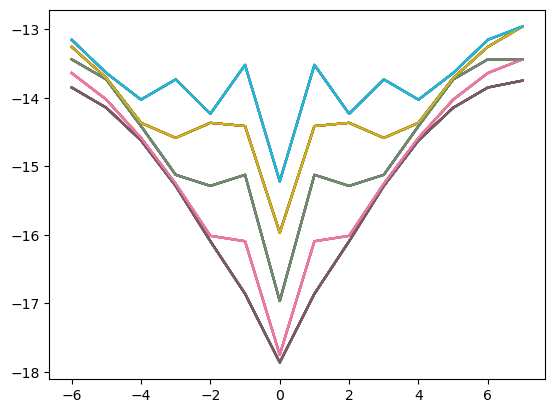

In [31]:

for i in range(N): 
    for l in range(5):
        plt.plot(k,eigvalues[:,l])

## d)
Call the function ed_conserve.calc_basis() and extract the dimensions of the blocks.
Plot the dimensions of the blocks versus N on a logarithmic y-scale.

In [61]:
#dim_of_qn = {}
#dim_of_qn["dim_of_qn_{}".format(i)] = len(basis[i])
dimofqn = []
N = np.linspace(5,15,10)
for n in N:
    basis, ind_inbasis = ed.calc_basis(int(n))
    a = [len(basis[i]) for i in range(-int(n)//2+1,int(n)//2+1)]
    dimofqn.append(a)    

In [62]:
print(dimofqn)

#print(dimofqn[2][0])
#print(dimofqn[2])

[[6, 6, 8, 6, 6], [11, 9, 14, 9, 11, 10], [18, 18, 18, 20, 18, 18, 18], [30, 33, 30, 36, 30, 33, 30, 34], [56, 58, 56, 56, 60, 56, 56, 58, 56], [105, 99, 105, 99, 108, 99, 105, 99, 105, 100], [186, 186, 186, 186, 186, 188, 186, 186, 186, 186, 186], [335, 346, 338, 344, 335, 352, 335, 344, 338, 346, 335, 348], [630, 630, 630, 630, 630, 630, 632, 630, 630, 630, 630, 630, 630], [2182, 2188, 2184, 2182, 2188, 2182, 2182, 2192, 2182, 2182, 2188, 2182, 2184, 2188, 2182]]


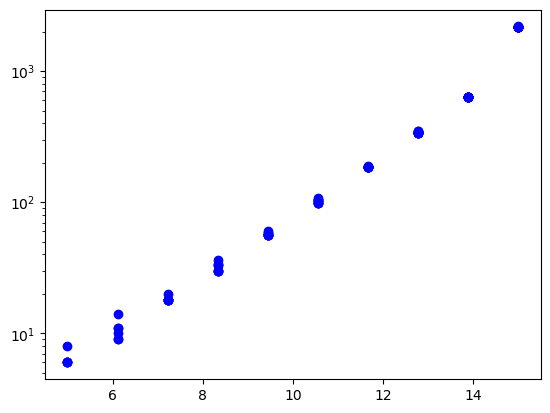

In [85]:
for i in range(len(dimofqn)):
    plt.semilogy([N[i]]*len(dimofqn[i]),dimofqn[i], 'bo')

## e) 
While the code uses momentum conservation, it does not exploit the parity symmetry: the operator $P = \prod_{j=0}^{N-1} \sigma_z$ with eigenvalues p = ±1 commutes with both
H and T . Adjust the functions ed_conserve.calc_basis() and ed_conserve.calc_H()
such that they exploit P for a further block-diagonalization of H.
Hint: Write a function to determine the parity eigenvalue p for a given spin configuration. Use tuples (p, k) (instead of simply k) as keys qn for the dictionaries
basis,ind_in_basis, H and adjust code using these keys. That’s all!

In [84]:
s = 24
bs = bin(s)[2:].zfill(10)
binary_list = [int(digit) for digit in bs]
binary_list



[0, 0, 0, 0, 0, 1, 1, 0, 0, 0]